#                                        Why are Students Absent?

### 1.0 Introduction

    New York City Public Schools are the largest public school system in the United States. As such, large datasets about all kinds of relevant topics are compiled every year in order to facilitate the best possible education for all New York City public school students. The data is publicly available and compiled by PASSNYC, a non-profit dedicated to broadening educational opportunities for New York City students. The dataset being used for this project is from 2016 called "2016 School Explorer". It contains data from 1270 New York City public that serve students from Kindergarten to grade eight. Based on the structuring of New York City public schools, this means that the data does not include high schools. The data contains information on schools, their location, the background of their students, and how they perform on New York State standardized tests. All data is based on averages among each school.
    In this project the data is being used to answer the question "Why are students absent?". This is a pertinent question for today's schools. Only recently, in 2016, did the US Department of Education release data for chronic absenteeism. It has not been tracked in aggregate so there is little research available to understand chronic absenteeism. Much of the current research on the topic is about its affects on students. This paper seeks instead to understand why chronic absenteeism occurs.
    TALK ABOUT RESULTS

### 1.0.1 Variables

    The X variables being used in this project are an economic need index, average ELA proficiency, average math proficiency, trust percentage, and strong family-community ties percentage. The economic need index is a number 0-1 with the lowest economic need being 0 and highest being 1. It is calculated using a formula using data from the percentage of students in temporary housing, eligibility for HRA, a New York City social services program, and reduced cost lunch provided to students with low income. Additionally, I am using the average ELA and Math proficiency for each school. This is measured through New York State standardized testing where anything above a score of 3 is a pass. Trust percentage is a survey-based statistic that reflects if relationships between students, families, and teachers is based on respect and trust. Similarly, strong family-community ties percentage is a rating that reflects how well the school forms partnerships with families and the community it serves. Percent of students chronically absent is the Y variable, and it measures the percent of students in every school that miss ten percent or more of school in the given year. 

    These variables give the most complete picture of a students background, integral for understanding chronic absenteeism. The economic need of a student could have an impact on whether or not the student comes to school as the student might have limited access to school supplies, reliable transportation, and time away from dependents. Additionally, average ELA and math test scores help to understand the academic background of the child. The trust a student and family has in their teachers could be a factor in whether or not they come to school. A lack of trust could lead to a poor sense of belonging for the student, leaading them not to attend school. Lastly, whether or not the school has strong ties with the community can affect a student's ability to come to school due to social services working with the school and ensuring relevance of teaching topics. 
    
    Edit last bit of the last paragraph, ask TA what of this is needed 

### 2. Data Cleaning/Loading

In [182]:
#import all software needed
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [183]:
#read in data
df = pd.read_csv('2016 School Explorer.csv')

This is the raw data from New York City public schools. The next step is to clean the data to use for a better understand of the X and Y variables.

In [184]:
#define relevant columns
relevant_columns = ['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency', 'Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']

In [185]:
#replace "N/A" to a null variable for relevant columns that contain "N/A"
df.replace('N/A', np.nan, inplace=True)

#eliminate rows with null variables in relevant columns
df.dropna(subset=relevant_columns, inplace=True)

Next, the data must be expressed in the correct type. In this case float types will work best in order to create tables and graphs based on the data.

In [186]:
columns_to_change = ['Trust %', 'Strong Family-Community Ties %', 'Percent of Students Chronically Absent']

#convert columns to float values
df[columns_to_change] = df[columns_to_change].apply(lambda x: x.str.rstrip('%').astype('float') / 100.0)

### Summary Statistics

Next, a table of the relevant columns is created.  

In [187]:
#create table with all relevant variables
relevant_columns_table = df[relevant_columns]

In [188]:
print("\nSummary Statistics")
relevant_columns_table.describe()


Summary Statistics


,Economic Need Index,Average ELA Proficiency,Average Math Proficiency,Trust %,Strong Family-Community Ties %,Percent of Students Chronically Absent
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,0.671048,2.534215,2.668956,0.903073,0.829589,0.216081
std,0.211201,0.363589,0.470470,0.061143,0.062508,0.140004
min,0.049000,1.810000,1.830000,0.000000,0.000000,0.000000
25%,0.550000,2.250000,2.300000,0.870000,0.800000,0.110000
50%,0.730000,2.450000,2.580000,0.910000,0.830000,0.200000
75%,0.840000,2.760000,2.980000,0.940000,0.870000,0.300000
max,0.957000,3.930000,4.200000,1.000000,0.990000,1.000000


Economic need index: The mean is very high, meaning many students rely on some type of government assistance. Additionally, the 25 percent distribution mark shows that over seventy five percent of schools have students with an economic need index of over 0.55, indicating outliers are bringing this statistic down. This means a majority of students rely on some sort of government assistance, meaning they are from lower income households. 

Average ELA Proficiency: 75% distribution mark is not a passing grade, meaning the vast majority of students are not proficient in ELA (reading).

Average Math Proficiency: 75% distribution mark is slightly better than that of ELA, possibly due to english language learners being a sizeable portion of the school. However, it still indicates that more than three fourths of students are not proficient in mathematics. 

Trust %: Generally fairly high trust in schools and its teachers with around ninety percent and not much deviation. Could be influenced by bias as its plausible that people with high trust in the school would be more inclined to take the survey.

Strong Family-Community Ties %: generally high family-community ties with low deviation from the high mean. Could be influenced through bias in the way the data is collected. Surveys could have been answered by peopke who feel more connected to the school and community. 

-> add chronically absent

change to paragraph form

In [189]:
#create table for chronic absence rate summary statistics for lower income schools
lower_income_schools = relevant_columns_table[relevant_columns_table['Economic Need Index'] > relevant_columns_table['Economic Need Index'].mean()]
chronic_absence_lower_income = lower_income_schools['Percent of Students Chronically Absent'].describe()

#clean table for readability
print("\nChronic Absence Rate Summary Statistics for Lower Income Schools")
print(chronic_absence_lower_income.to_string(index=True))

#show stuff in dataframe


Chronic Absence Rate Summary Statistics for Lower Income Schools
count    734.000000
mean       0.271935
std        0.139042
min        0.000000
25%        0.180000
50%        0.270000
75%        0.350000
max        1.000000


This data suggests that students with greater economic need have a higher rate of chronic absenteeism. The mean of lower income chronically absent students is higher, as well as the 25%, 50%, and 75% distributions, leading to the conclusion that outliers are not skewing this data, and lower income students have higher rates of chronic absenteeism. The data shows that one fourth of schools with students that on average have lower than the average in New York City have a chronic absentee rating of thirty five percent, a surprisingly large number. This means that thirty five percent of students in those schools are absent for more than ten percent of school days per year. 

EDIT THIS - talk about analysis, not just regurgitating stats -> possibly reasons why

In [190]:
#create table for chronic absence rate summary statistics for schools with average scores of 2 or below of math and ELA exams
schools_under_proficiency = relevant_columns_table[relevant_columns_table['Average ELA Proficiency'] <= 2.58]
chronic_absence_under_proficiency = schools_under_proficiency['Percent of Students Chronically Absent'].describe()

#clean table for readability
print("\nChronic Absence Rates Summary Statistics for Schools with below median math and ELA Scores")
print(chronic_absence_under_proficiency.to_string(index=True))


Chronic Absence Rates Summary Statistics for Schools with below median math and ELA Scores
count    749.000000
mean       0.268131
std        0.109411
min        0.000000
25%        0.190000
50%        0.260000
75%        0.350000
max        0.740000


The data shows chronic absenteeism is more common in schools with students who score, on average, lower than other New York City public schools. Generally, the numbers are very similar to those with lower income, with schools who have students who both score low on math and ELA exams also having relatively higher chronic absence rates compared to the rest of New York City public schools. 

_>add possible reasons why


### Plots, Histograms, Figures

Next, create histograms for each variable. 

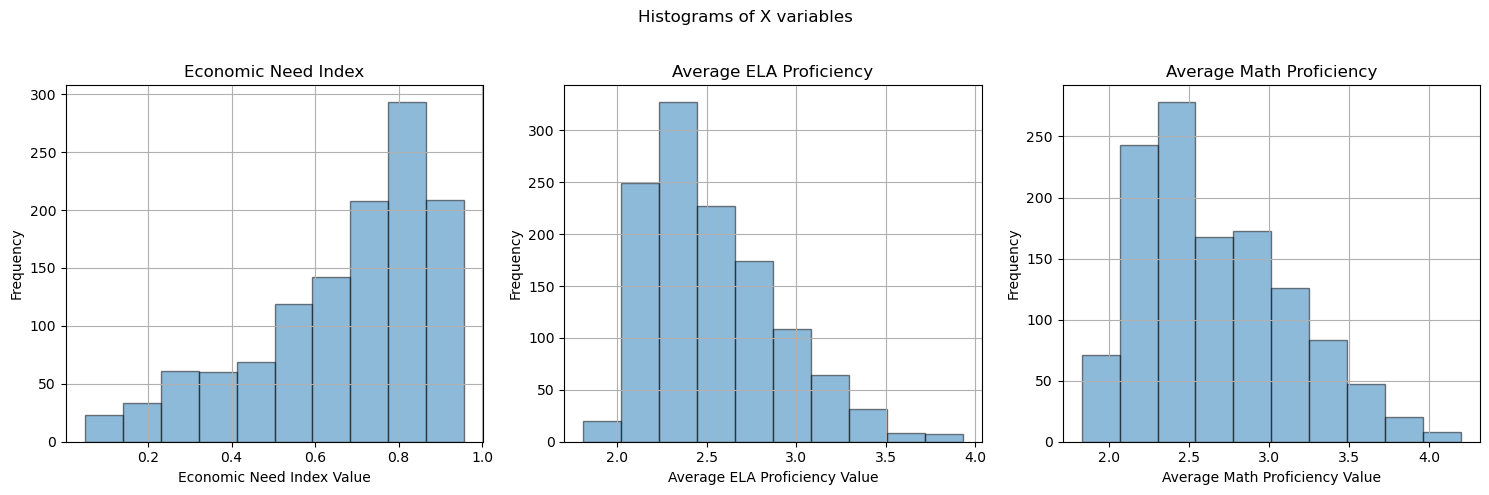

In [191]:
first_variables = df[['Economic Need Index', 'Average ELA Proficiency', 'Average Math Proficiency']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Histograms of X variables')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms
for i, (column, variable) in enumerate(first_variables.items()):
    variable.hist(bins=10, alpha=0.5, ax=axes[i], edgecolor= 'black')
    axes[i].set_title(column)
    axes[i].set_xlabel(f'{column} Value')  # Set unique x-axis label for each subplot
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

#add a border maybe first 3 on top together, then other 2 

The economic need index shows a left skewed distribution. This indicates that a high number of New York City public schools serve students with high amounts of economic need. This is possibly due to higher rates of poverty in New York City compared to the United States national average. Both test score histograms indicate that many schools tend to have non-proficient exam scores on average. 

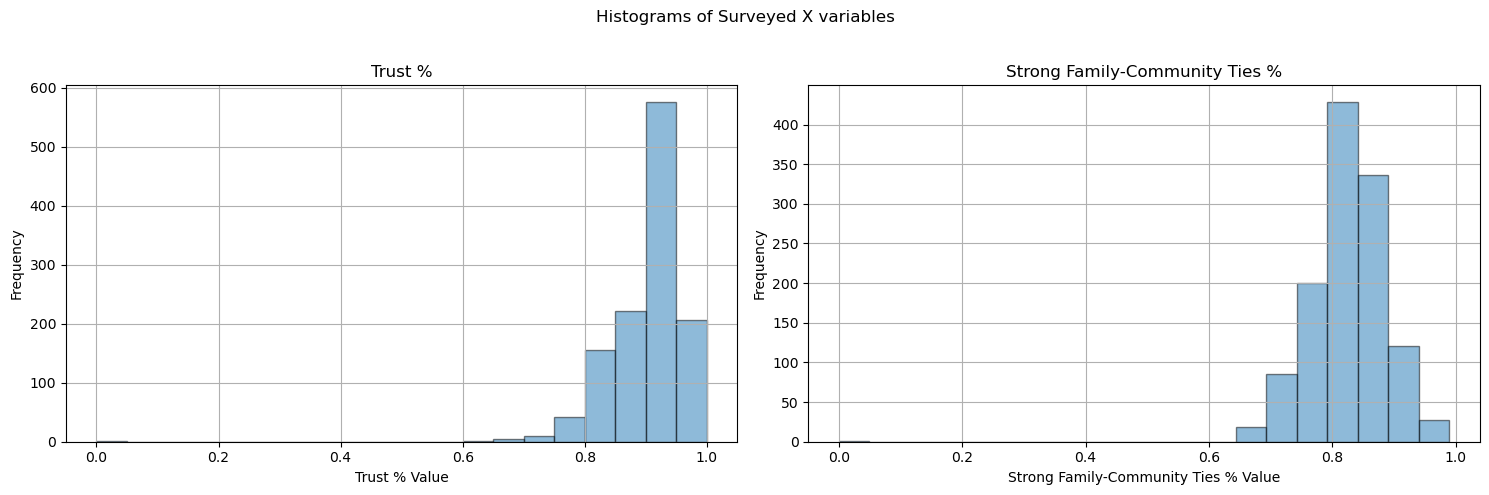

In [192]:
second_variables = df[['Trust %', 'Strong Family-Community Ties %']]

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Histograms of Surveyed X variables')

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot histograms
for i, (column, variable) in enumerate(second_variables.items()):
    variable.hist(bins=20, alpha=0.5, ax=axes[i], edgecolor= 'black')
    axes[i].set_title(column)
    axes[i].set_xlabel(f'{column} Value')  # Set unique x-axis label for each subplot
    axes[i].set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

Both graphs show a heavy left skew. This means that the data shows high trust and community ties in most New York City public schools on average. However, this could possibly be due to the fact that this data was compiled through a survey by the school system, meaning the only people who responded could be more involved with school system than the average. 

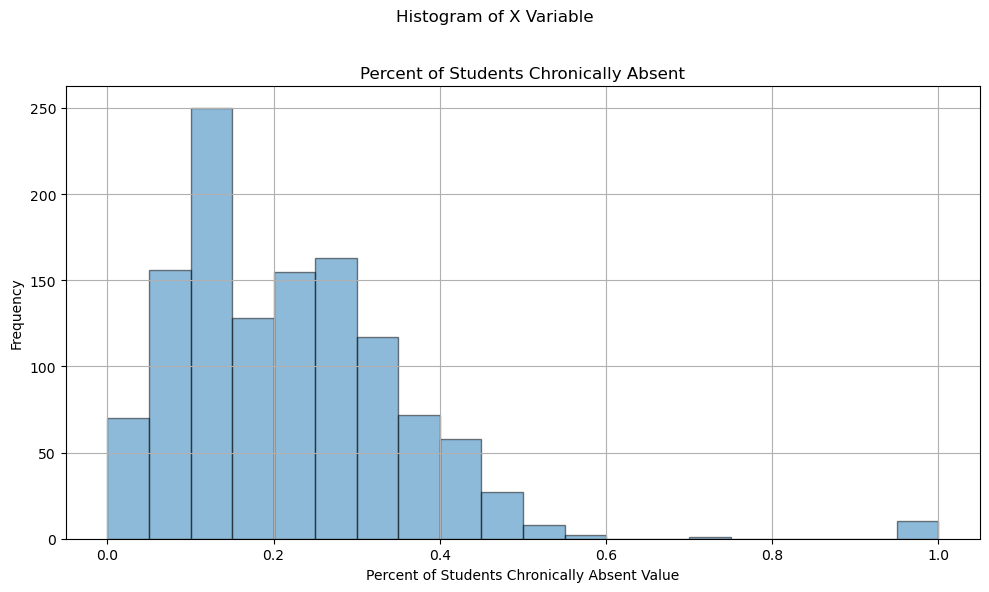

In [193]:
third_variable = df[['Percent of Students Chronically Absent']]

third_variable = df[['Percent of Students Chronically Absent']]

# Create subplots
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Histogram of X Variable')

# Plot histogram
third_variable.hist(bins=20, alpha=0.5, ax=ax, edgecolor='black')
ax.set_title(third_variable.columns[0])
ax.set_xlabel(f'{third_variable.columns[0]} Value')  # Set x-axis label
ax.set_ylabel('Frequency')

# Adjust the layout to prevent title and label overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

The percent of students chronically absent shows a right skew, meaning that most schools have a mean greater than the median. This means that New York City public schools have a lower rate of chronic absenteeism than what is indicated by the mean. The schools who report a chronic absenteeism rate of close to 100% indicate that almost all students missed over ten percent of school days. This could either be due to extremely high rates of absences in the schools or false data. More analysis will be needed to determine the cause of these outlier schools' chronic absence rates. 

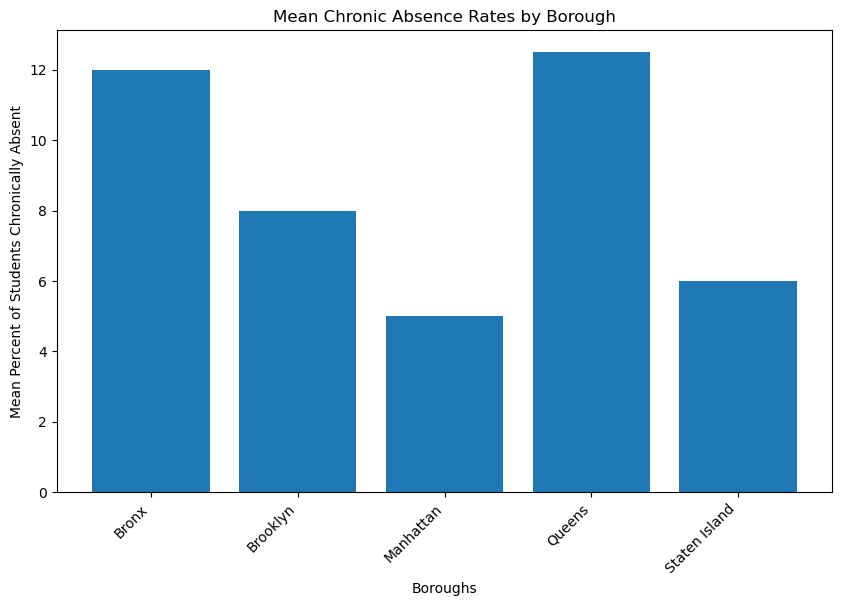

In [218]:
#create bar graph for chronic absentee rates for each borough

# Assuming applicable_columns_table is your DataFrame with columns 'Percent of Students Chronically Absent' and 'Zip'
applicable_columns_table = df[['Percent of Students Chronically Absent', 'Zip']]

# Sample DataFrame with 'Zip' and 'Percent of Students Chronically Absent' columns
data = {'Zip': [10005, 11201, 10465, 10314, 11101, 11432],
        'Percent of Students Chronically Absent': [5, 8, 12, 6, 10, 15]}
applicable_columns_table = pd.DataFrame(data)

# Define the get_borough function
def get_borough(zip_code):
    if 10001 <= zip_code <= 10282:
        return 'Manhattan'
    elif 10301 <= zip_code <= 10314:
        return 'Staten Island'
    elif 10451 <= zip_code <= 10475:
        return 'Bronx'
    elif (11004 <= zip_code <= 11109) or (11351 <= zip_code <= 11697):
        return 'Queens'
    elif 11201 <= zip_code <= 11256:
        return 'Brooklyn'
    else:
        return 'Unknown'

# Apply the get_borough function to create a new 'Borough' column
applicable_columns_table['Borough'] = applicable_columns_table['Zip'].apply(get_borough)

# Group by 'Borough' and calculate the mean of chronic absence rates
grouped_data = applicable_columns_table.groupby('Borough')['Percent of Students Chronically Absent'].mean().reset_index()

# Special handling for Queens - average rates for both groups of ZIP codes
queens_data = applicable_columns_table[applicable_columns_table['Borough'] == 'Queens'].copy()  # Make a copy to avoid the warning
grouped_queens_data = queens_data.groupby('Zip')['Percent of Students Chronically Absent'].mean().reset_index()

# Add the mean of both groups to the overall 'Queens' entry
grouped_data.loc[grouped_data['Borough'] == 'Queens', 'Percent of Students Chronically Absent'] = grouped_queens_data['Percent of Students Chronically Absent'].mean()

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Borough'], grouped_data['Percent of Students Chronically Absent'])
plt.xlabel('Boroughs')
plt.ylabel('Mean Percent of Students Chronically Absent')
plt.title('Mean Chronic Absence Rates by Borough')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

plt.show()

This bar graph shows the average percent of students chronically absent across schools in each New York City borough. The Bronx shows the second highest rates of chronically absent students in the city, which could possibly be due to the fact that it has the highest percent of its population living under the poverty line, and it was shown in the summary statistics that that would indicate a higher amount of chronically absent students. Queens being first in percentage of chronically absent students is surprising and is an interesting opportunity for further research. The borough has the least share of residents living in poverty in New York City so other possible factors must be at play. One explanation is that being more wealthy, many residents could send their children to private schools, leaving a higher proportion of public school students living under the poverty line compared to general public. 

### Next Steps

In [180]:
This offers an interesting spot for further exploration with regression analysis, as it seems through summary statistics there is a relation between both test scores and income with chronic absense rates.

SyntaxError: invalid syntax (38431486.py, line 1)